<a href="https://colab.research.google.com/github/Narad0505/Car-price-Prediction-with-Machine-Learning/blob/main/Car%20price%20Prediction%20with%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Car price Prediction with Machine Learning

Step 1: Libraries import

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")


Step 2: CSV load karna

In [2]:

df = pd.read_csv("/content/car data.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Step 3: Data info check

In [3]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())


Shape: (301, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


Step 4: Summary aur missing / duplicates

In [4]:
print("\nSummary stats:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())



Summary stats:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

Missing values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Duplicate rows: 2


Step 5: Remove Duplicates

In [5]:
df = df.drop_duplicates().reset_index(drop=True)
print("New shape:", df.shape)


New shape: (299, 9)


Step 6:Histogram of Numeric columns

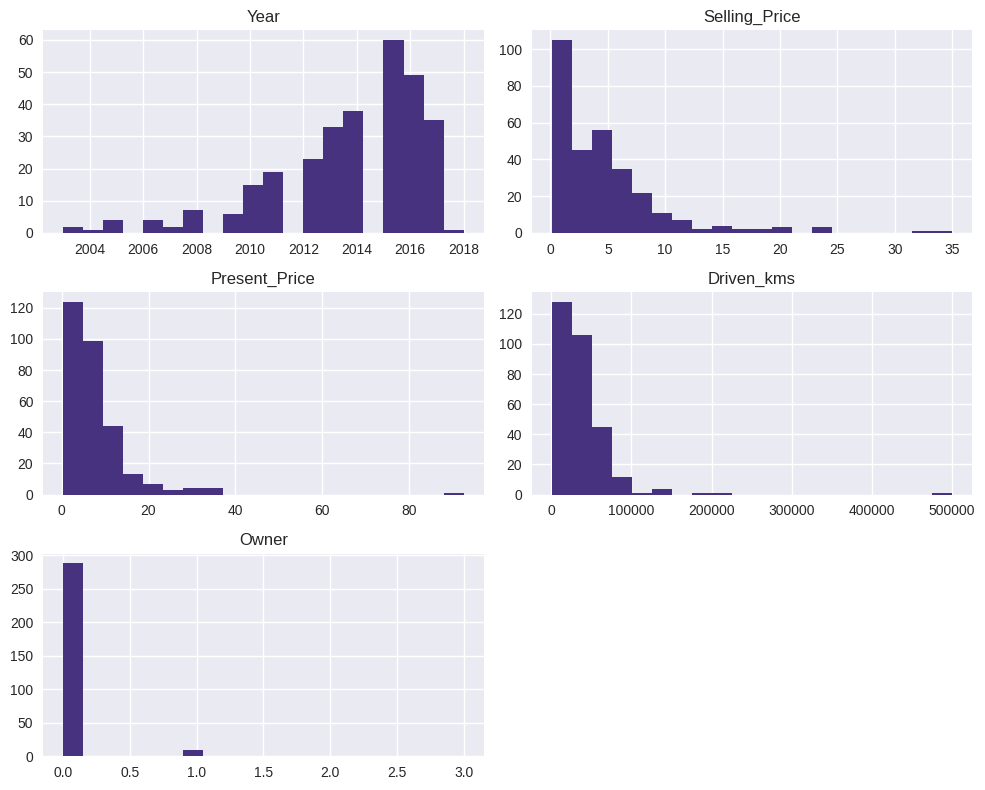

In [6]:
numeric_cols = ["Year", "Selling_Price", "Present_Price", "Driven_kms", "Owner"]

df[numeric_cols].hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


Step 7: Brand and Car_Age

In [7]:

df["Brand"] = df["Car_Name"].str.split().str[0]


current_year = 2025
df["Car_Age"] = current_year - df["Year"]

df[["Car_Name", "Brand", "Year", "Car_Age"]].head()


,Car_Name,Brand,Year,Car_Age
0,ritz,ritz,2014,11
1,sx4,sx4,2013,12
2,ciaz,ciaz,2017,8
3,wagon r,wagon,2011,14
4,swift,swift,2014,11


Step 8:Choose columns for Modeling

In [8]:

df_model = df.drop(["Car_Name", "Year"], axis=1)
df_model.head()


,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Brand,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,ritz,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,sx4,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,ciaz,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,wagon,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,swift,11


Step 9:convert of Categorical columns in dummy

In [9]:
cat_cols = ["Fuel_Type", "Selling_type", "Transmission", "Brand"]

df_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)
print("Encoded shape:", df_encoded.shape)
df_encoded.head()


Encoded shape: (299, 52)


,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Brand_Activa,...,Brand_land,Brand_omni,Brand_ritz,Brand_s,Brand_swift,Brand_sx4,Brand_verna,Brand_vitara,Brand_wagon,Brand_xcent
0,3.35,5.59,27000,0,11,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,4.75,9.54,43000,0,12,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,7.25,9.85,6900,0,8,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2.85,4.15,5200,0,14,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,4.60,6.87,42450,0,11,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


Step 10: X (features) and y (target)

In [10]:
X = df_encoded.drop("Selling_Price", axis=1)
y = df_encoded["Selling_Price"]

print("Features:", X.shape)
print("Target:", y.shape)


Features: (299, 51)
Target: (299,)


Step 11: Train–test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42
      )

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)



X_train: (239, 51)
X_test: (60, 51)


Step 12: Train the Linear Regression model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("No. of coefficients:", len(model.coef_))


Intercept: 7.296409587997776
No. of coefficients: 51


Step 13: Prediction

In [14]:
y_pred = model.predict(X_test)
y_pred[:5]


array([ 8.37832572,  7.20582637,  1.76321329,  6.72656135, 11.5136192 ])

Step 14: Metrics – MSE, RMSE, R²

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)


MSE: 11.530465001023488
RMSE: 3.3956538399877405
R²: 0.5526191096181184


Step 15: Actual vs Predicted graph

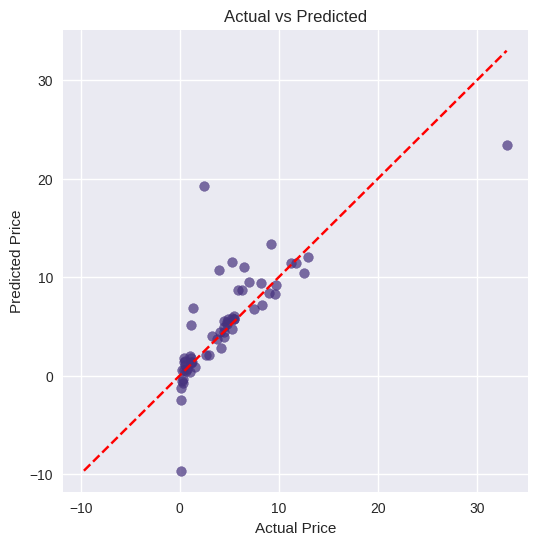

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], "r--")
plt.show()


Step 16: View the feature importance.

In [17]:
feat_imp = pd.DataFrame({
      "feature": X.columns,
          "coef": model.coef_
          }).sort_values(by="coef", ascending=False)

feat_imp.head(15)



,feature,coef
4,Fuel_Type_Diesel,1.159532e+00
0,Present_Price,7.583640e-01
2,Owner,5.236521e-01
5,Fuel_Type_Petrol,3.567191e-01
6,Selling_type_Individual,1.027030e-01
14,Brand_Mahindra,1.081357e-13
24,Brand_camry,1.776357e-15
48,Brand_vitara,0.000000e+00
44,Brand_s,-5.551115e-16
12,Brand_Hyosung,-2.394404e-13
